## Charity Funding Predictor

##### The non-profit foundation Alphabet Soup wants to create an algorithm to predict whether or not applicants for funding will be successful. With your knowledge of machine learning and neural networks, you’ll use the features in the provided dataset to create a binary classifier that is capable of predicting whether applicants will be successful if funded by Alphabet Soup.
##### From Alphabet Soup’s business team, you have received a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. Within this dataset are a number of columns that capture metadata about each organization, such as the following:

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import seaborn as sns
import joblib

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("/home/dan/Documents/Repo/smu-dal-data-pt-09-2021-u-c/02-Homework/21-Deep-Learning/Resources/charity_data.csv")
application_df.head()

2022-06-14 15:14:34.839799: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 15:14:34.839814: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.STATUS.nunique()

2

In [3]:
application_df['ASK_AMT'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 34299 entries, 0 to 34298
Series name: ASK_AMT
Non-Null Count  Dtype
--------------  -----
34299 non-null  int64
dtypes: int64(1)
memory usage: 268.1 KB


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(['EIN','NAME'], 1)

/tmp/ipykernel_15129/1102753846.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(['EIN','NAME'], 1)


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

/home/dan/anaconda3/envs/Three_Dot_Ten/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='APPLICATION_TYPE', ylabel='count'>

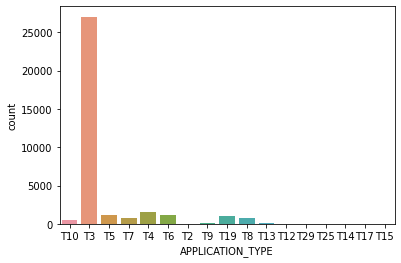

In [6]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
app_counts = application_df['APPLICATION_TYPE'].value_counts()
sns.countplot(application_df['APPLICATION_TYPE'])

/home/dan/anaconda3/envs/Three_Dot_Ten/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='APPLICATION_TYPE', ylabel='count'>

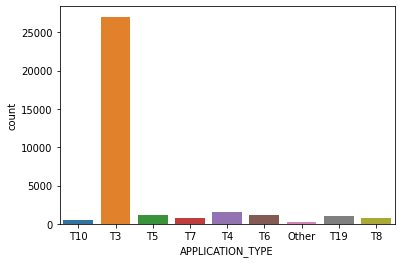

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace  = list(app_counts[app_counts < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
sns.countplot(application_df['APPLICATION_TYPE'])

In [8]:
# Look at CLASSIFICATION value counts for binning
class_count =  application_df['CLASSIFICATION'].value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts = class_count[class_count > 1]
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = application_types_to_replace  = list(class_counts[class_counts < 5000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
Other    10873
C2000     6074
C1580        1
C1900        1
C1820        1
C6100        1
C1248        1
C2600        1
C1370        1
C5200        1
C4200        1
C2190        1
C1236        1
C2570        1
C2500        1
C3700        1
C1570        1
C1283        1
C2380        1
C1732        1
C1728        1
C2170        1
C4120        1
C8210        1
C4500        1
C1245        1
C2561        1
C2150        1
Name: CLASSIFICATION, dtype: int64

In [11]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
df = pd.get_dummies(data = application_df, columns=['APPLICATION_TYPE','AFFILIATION','ORGANIZATION','CLASSIFICATION','SPECIAL_CONSIDERATIONS','USE_CASE','INCOME_AMT'])

In [13]:
# Split our preprocessed data into our features and target arrays
X = df.drop(['IS_SUCCESSFUL'], axis = 'columns').values
y = df['IS_SUCCESSFUL'].values
# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=52)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units =55,activation='relu', input_dim= len(X_train[0])))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=55, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# nn.add(tf.keras.layers.Dense(units=1, activation="softmax")) This has .55 accurancy

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 55)                3685      
                                                                 
 dense_1 (Dense)             (None, 55)                3080      
                                                                 
 dense_2 (Dense)             (None, 1)                 56        
                                                                 
Total params: 6,821
Trainable params: 6,821
Non-trainable params: 0
_________________________________________________________________


2022-06-14 15:14:49.010724: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 15:14:49.010895: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 15:14:49.010934: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-14 15:14:49.010966: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-14 15:14:49.010998: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=300)

Epoch 1/300
804/804 [==============================] - 1s 777us/step - loss: 0.5750 - accuracy: 0.7217
Epoch 2/300
804/804 [==============================] - 1s 891us/step - loss: 0.5607 - accuracy: 0.7296
Epoch 3/300
804/804 [==============================] - 1s 774us/step - loss: 0.5575 - accuracy: 0.7297
Epoch 4/300
804/804 [==============================] - 1s 716us/step - loss: 0.5564 - accuracy: 0.7304
Epoch 5/300
804/804 [==============================] - 1s 882us/step - loss: 0.5551 - accuracy: 0.7312
Epoch 6/300
804/804 [==============================] - 1s 845us/step - loss: 0.5536 - accuracy: 0.7313
Epoch 7/300
804/804 [==============================] - 1s 913us/step - loss: 0.5537 - accuracy: 0.7319
Epoch 8/300
804/804 [==============================] - 1s 910us/step - loss: 0.5530 - accuracy: 0.7314
Epoch 9/300
804/804 [==============================] - 1s 804us/step - loss: 0.5524 - accuracy: 0.7319
Epoch 10/300
804/804 [==============================] - 1s 815us/step - l

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5986 - accuracy: 0.7214 - 224ms/epoch - 837us/step
Loss: 0.5985708832740784, Accuracy: 0.7213994264602661


##### Saving the model using Joblib

In [19]:
# Export our model
filename = 'Deeplearning.sav'
joblib.dump(nn, filename)

INFO:tensorflow:Assets written to: ram://1a208986-36d3-4633-b476-22571b4d1a0d/assets


['Deeplearning.sav']

##### The model was meant to predict Accurately which Charity would get funding 72% of the time, after running for 300 Epoochs.